In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
# fetch_mldata() has died. Needs to be replaced with fetch_openml

mnist = fetch_openml('MNIST original')

HTTPError: HTTP Error 400: Bad Request

In [5]:
#fetch_openml has a diferent library as well. Let's test sklearn_datasets

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

ImportError: cannot import name 'fetch_mldata' from 'sklearn.datasets' (c:\python37\lib\site-packages\sklearn\datasets\__init__.py)

In [6]:
# Fun stuff! The author himself made notes of the new versions so follow this
# https://github.com/ageron/handson-ml/issues/301

from sklearn.datasets import fetch_openml

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
    
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [7]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [8]:
X, y = mnist["data"],mnist["target"]

In [9]:
X.shape

(70000, 784)

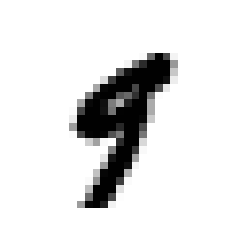

In [10]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
y(36000)

TypeError: 'numpy.ndarray' object is not callable

In [12]:
y[36000]

'9'

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [15]:
shuffle_index

array([23012,  8656, 56457, ..., 48256, 34796, 55762])

In [16]:
y_train

array(['1', '5', '3', ..., '8', '1', '8'], dtype=object)

In [42]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [43]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

ValueError: The number of classes has to be greater than one; got 1 class

In [19]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [21]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

ValueError: The number of classes has to be greater than one; got 1 class

In [23]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [24]:
sgd_clf.predict([some_digit])

array(['9'], dtype='<U1')

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method=)

SyntaxError: invalid syntax (<ipython-input-25-af5296c877d4>, line 1)

In [40]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.base import clone, BaseEstimator

skfolds = StratifiedKFold(n_splits=3, random_state=42)


In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

ValueError: The number of classes has to be greater than one; got 1 class

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

NameError: name 'y_scores' is not defined

In [44]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [45]:
y_train_5

array([False, False, False, ..., False, False, False])

In [46]:
y_test_5

array([False, False, False, ..., False, False, False])

In [47]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

ValueError: The number of classes has to be greater than one; got 1 class

In [48]:
#something is wrong with y_train_5 indeed

from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))

In [49]:
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array(['4'], dtype=object)

In [50]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['9'], dtype='<U1')

In [54]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
method="predict_proba")

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array(['9'], dtype=object)